In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo



In [2]:
!pip install ucimlrepo

In [6]:
# load the dataset
air_quality = fetch_ucirepo(id=360)

# check the dataset
print(air_quality.DESCR)

None


In [7]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [11]:
# convert to dataframe
air_quality_df = air_quality.data.features

In [12]:
features = air_quality_df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

NameError: name 'features' is not defined

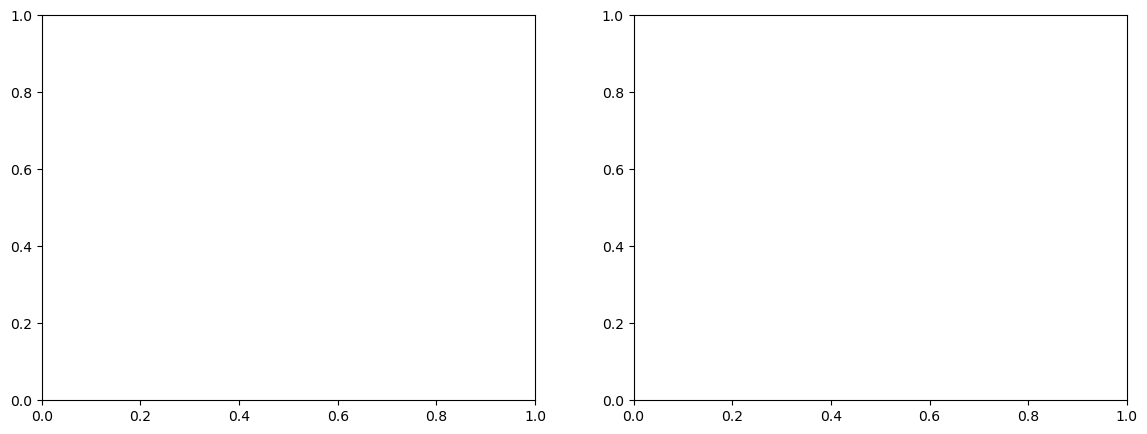

In [ ]:
# visualize anomalies - Multiple feature comparison

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.5, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.5, s=30, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.5, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.5, s=30, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].lengend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Normal data points: {len(normal)}")
print(f"Anomalous data points: {len(anomaly)}")

